In [1]:
import scanpy as sc
import pandas as pd
import scvi
import numpy as np
import pandas as pd
import seaborn as sns

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata=sc.read_csv('/data2/ZenNa/DFU_Project/Data/Foot skin/GSM5050522_Diabetic.csv').T
adata

AnnData object with n_obs × n_vars = 985 × 14364

In [3]:
pwd

'/data2/ZenNa/DFU_Project/Code'

In [4]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACCTGCATGTAAGA, AAACCTGGTGTGACGA, AAACGGGAGGCTACGA, AAACGGGTCTTGTTTG, AAAGATGGTCAGAGGT, AAAGATGGTCCAAGTT, AAAGCAAAGCGTTTAC, AAAGCAAAGTAGTGCG, AAAGCAAGTCGATTGT, AAAGCAATCCTATGTT, AAAGTAGAGTTGCAGG, AAATGCCCACTTCTGC, AAATGCCCATCTCCCA, AAATGCCGTCTAAAGA, AACACGTCAAAGGCGT, AACACGTCACAGATTC, AACACGTTCCCAACGG, AACACGTTCTAAGCCA, AACCATGAGATGCCTT, AACCATGCAGTTCCCT, AACCGCGGTATAGGGC, AACGTTGAGATGTGGC, AACTCAGAGCGAGAAA, AACTCAGAGTCGTACT, AACTCAGAGTGTTGAA, AACTCCCCAACACCCG, AACTCCCGTCGCTTTC, AACTCTTAGTCCATAC, AACTCTTGTGAGGGAG, AACTCTTGTGTGAAAT, AACTCTTTCTGAGGGA, AACTGGTTCCGAAGAG, AACTTTCCAGCTATTG, AACTTTCTCTTACCTA, AAGGAGCAGGGTTCCC, AAGGTTCAGCGTAGTG, AAGGTTCGTGTGGCTC, AAGTCTGCATTACCTT, AATCCAGAGGGAGTAA, AATCCAGCAGCCTTGG, AATCCAGTCAATCTCT, AATCGGTCACCCATGG, ACACCAAAGAAGGCCT, ACACCAAAGAGTGACC, ACACCAAGTAAGTGGC, ACACCCTGTCATCGGC, ACACCCTTCGCGCCAA, ACACCGGAGGAATTAC, ACACCGGCATCGATGT, ACACCGGGTAATCACC, ACACTGACAGGATCGA, ACACTGAGTCAGAAGC, ACACTGAGTTAAGTAG, ACAGCCGAGTGAACGC, ACAGCCGTCAGTTCGA, ACAGCCGTCTGGCGAC, ACAGCTACAAGTCATC, ACAGCTATCGCCTGTT, ACATACGAGAATGTGT, ACATACGGTATGAATG, ACATACGGTGTCGCTG, ACATCAGAGCACCGCT, ACATGGTCAGGATTGG, ACATGGTGTAGCTTGT, ACCAGTATCGTGGGAA, ACCGTAAGTAATCGTC, ACCTTTAGTAGCTAAA, ACGAGCCCATTTGCCC, ACGAGCCGTGTTTGTG, ACGAGGATCATAACCG, ACGAGGATCGGCTTGG, ACGATACAGCTAGTCT, ACGATACAGGACCACA, ACGATACGTTCCATGA, ACGATACGTTGTACAC, ACGATGTAGCTATGCT, ACGATGTGTCCGTCAG, ACGCAGCCACCCAGTG, ACGCCAGAGATAGCAT, ACGCCAGGTGATGTGG, ACGCCGAAGCTGATAA, ACGCCGAGTCGAACAG, ACGCCGATCAGTTGAC, ACGCCGATCCTGCCAT, ACGGAGACACACAGAG, ACGGAGAGTCTGATCA, ACGGCCAAGCTACCGC, ACGGCCACATTCTTAC, ACGGGCTGTCGCTTCT, ACGGGTCAGGTGTGGT, ACGGGTCTCAGCATGT, ACGTCAAAGCTTCGCG, ACGTCAAGTGGCGAAT, ACTATCTCACACTGCG, ACTATCTGTCCCTTGT, ACTGAACAGATCTGAA, ACTGAACAGGCCCTCA, ACTGAGTAGCTAGTCT, ACTGAGTCACCGGAAA, ACTGAGTCAGCTGGCT, ...]

[985 rows x 0 columns]

In [5]:
sc.pp.filter_genes(adata, min_cells = 3)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [6]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [7]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [8]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train(use_gpu=True)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scvi/train/_trainrunner.py:76: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/lightning/p

Epoch 400/400: 100%|█| 400/400 [00:19<00:00, 20.67it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:19<00:00, 21.00it/s, v_num=1, train_loss_step


In [9]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 343/400:  86%|▊| 343/400 [00:13<00:02, 25.24it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.304. Signaling Trainer to stop.


In [10]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df

doublet   singlet prediction
AAACCTGCATGTAAGA -0.862016 -0.087172    singlet
AAACCTGGTGTGACGA -2.293441  2.116259    singlet
AAACGGGAGGCTACGA -0.635094 -0.118972    singlet
AAACGGGTCTTGTTTG -0.724944  0.247864    singlet
AAAGATGGTCAGAGGT -1.436045  1.775915    singlet
...                    ...       ...        ...
TTTGGTTAGGGCTTGA -1.167554 -0.346266    singlet
TTTGGTTGTGAGTGAC -3.146623  2.626246    singlet
TTTGTCAAGATGTCGG  0.089053  0.442881    singlet
TTTGTCACAAGCCGTC  0.386991 -0.258243    doublet
TTTGTCATCTTCGAGA -0.746042  0.617836    singlet

[985 rows x 3 columns]

In [11]:
df.groupby('prediction').count()

doublet  singlet
prediction                  
doublet         128      128
singlet         857      857

In [12]:
df['dif'] = df.doublet - df.singlet
df

doublet   singlet prediction       dif
AAACCTGCATGTAAGA -0.862016 -0.087172    singlet -0.774844
AAACCTGGTGTGACGA -2.293441  2.116259    singlet -4.409699
AAACGGGAGGCTACGA -0.635094 -0.118972    singlet -0.516121
AAACGGGTCTTGTTTG -0.724944  0.247864    singlet -0.972808
AAAGATGGTCAGAGGT -1.436045  1.775915    singlet -3.211960
...                    ...       ...        ...       ...
TTTGGTTAGGGCTTGA -1.167554 -0.346266    singlet -0.821288
TTTGGTTGTGAGTGAC -3.146623  2.626246    singlet -5.772869
TTTGTCAAGATGTCGG  0.089053  0.442881    singlet -0.353828
TTTGTCACAAGCCGTC  0.386991 -0.258243    doublet  0.645234
TTTGTCATCTTCGAGA -0.746042  0.617836    singlet -1.363878

[985 rows x 4 columns]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


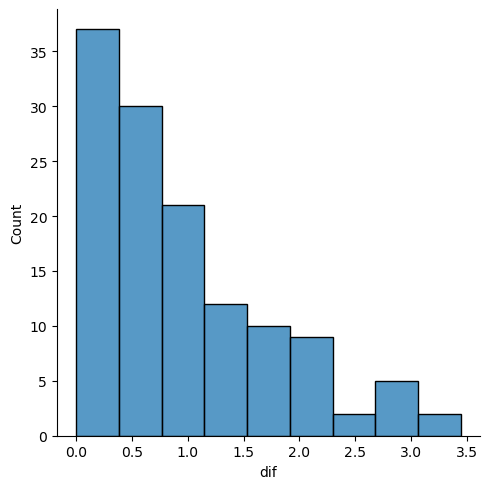

In [13]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [14]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

doublet   singlet prediction       dif
AACCATGCAGTTCCCT  1.596408 -1.209832    doublet  2.806240
ACGAGGATCGGCTTGG  1.225471 -1.677242    doublet  2.902714
ACTGTCCGTTATTCTC  0.864968 -1.374564    doublet  2.239533
ACTTACTAGGGCATGT  0.627788 -0.479351    doublet  1.107139
ACTTACTGTAGGACAC  0.845589 -1.435591    doublet  2.281179
ATAACGCGTAGCCTCG  1.347761 -0.730239    doublet  2.078000
ATTACTCGTTATCGGT  0.797423 -1.421601    doublet  2.219024
CAACCAACAGATGGGT  0.560847 -0.751599    doublet  1.312446
CAAGTTGGTCCCTTGT  0.878116 -2.219178    doublet  3.097295
CACACTCAGTGCCATT  0.731468 -0.488835    doublet  1.220303
CAGCGACGTTTGACTG  0.853327 -0.427122    doublet  1.280449
CATTCGCCATCTCCCA  0.718028 -0.391679    doublet  1.109707
CATTCGCGTCTAGCGC  0.800747 -0.831453    doublet  1.632200
CCACGGATCGCCTGTT  0.424856 -1.014129    doublet  1.438985
CCGTACTGTGGACGAT  0.567313 -1.490942    doublet  2.058255
CTAATGGCACGACGAA  0.609614 -1.370823    doublet  1.980437
CTCGAAAGTATATGAG  0.592508 -0.778412    doublet  1.370920
CTCGGGACACAGAGGT  0.706341 -0.742561    doublet  1.448901
CTCGTCATCTACTCAT  0.573866 -1.104358    doublet  1.678224
CTGAAACGTAGAAAGG  0.819547 -1.298449    doublet  2.117996
CTGCCTATCAACACTG  0.659642 -0.767108    doublet  1.426751
CTGCGGAAGCCCGAAA  0.261500 -1.065666    doublet  1.327166
CTTTGCGGTTTAGGAA  1.508464 -1.513638    doublet  3.022101
GAATAAGTCAGGATCT  0.931701 -0.764120    doublet  1.695821
GAATGAAGTATCAGTC  0.366760 -0.830339    doublet  1.197100
GATCGATCACCGAAAG  0.627578 -0.441879    doublet  1.069457
GATGAGGTCCGCATAA  0.804724 -0.709400    doublet  1.514123
GCAGCCACATTTGCTT  0.773930 -0.870169    doublet  1.644099
GCATGCGCAGGATCGA  1.381462 -1.301521    doublet  2.682983
GGACGTCCAATGACCT  1.358831 -0.435293    doublet  1.794124
GTACTTTGTTAAGGGC  0.810352 -0.746721    doublet  1.557073
GTCTTCGGTGTCGCTG  2.203545 -1.241400    doublet  3.444944
GTGAAGGAGAGGTACC  1.263141 -1.141191    doublet  2.404332
TAAGCGTGTCCTCTTG  1.428266  0.256166    doublet  1.172101
TAGACCATCGCCCTTA  0.843513 -0.213580    doublet  1.057094
TCATTACTCCGGCACA  1.287100 -1.557872    doublet  2.844972
TCGGTAAGTGTTCTTT  0.504023 -0.523318    doublet  1.027341
TCTATTGGTAAGGGCT  1.488698 -0.824319    doublet  2.313018
TCTTTCCCACGCTTTC  0.645709 -1.139943    doublet  1.785651
TGACTAGAGATAGCAT  0.571472 -1.428690    doublet  2.000162
TGCACCTTCCACTCCA  0.896099 -0.756705    doublet  1.652803
TTAACTCGTAATCGTC  0.630099 -0.575974    doublet  1.206073
TTAGGACAGTGGGCTA  0.576569 -1.211407    doublet  1.787977
TTCTCCTCACTGAAGG  0.515419 -1.181293    doublet  1.696712
TTTACTGCAAGTACCT  1.148028 -0.814628    doublet  1.962656

In [15]:
adata

AnnData object with n_obs × n_vars = 985 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [16]:
adata_reLoad=sc.read_csv('/data2/ZenNa/DFU_Project/Data/Foot skin/GSM5050522_Diabetic.csv').T

In [17]:
adata_reLoad.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [18]:
adata_reLoad.obs

doublet
AAACCTGCATGTAAGA    False
AAACCTGGTGTGACGA    False
AAACGGGAGGCTACGA    False
AAACGGGTCTTGTTTG    False
AAAGATGGTCAGAGGT    False
...                   ...
TTTGGTTAGGGCTTGA    False
TTTGGTTGTGAGTGAC    False
TTTGTCAAGATGTCGG    False
TTTGTCACAAGCCGTC    False
TTTGTCATCTTCGAGA    False

[985 rows x 1 columns]

In [19]:
adata_reMoveDoublet = adata_reLoad[~adata_reLoad.obs.doublet] #the~ mean you keep the False

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [20]:
adata_reLoad

AnnData object with n_obs × n_vars = 985 × 14364
    obs: 'doublet'

In [21]:
adata_reMoveDoublet

View of AnnData object with n_obs × n_vars = 940 × 14364
    obs: 'doublet'

In [22]:
adata_reMoveDoublet

View of AnnData object with n_obs × n_vars = 940 × 14364
    obs: 'doublet'

#Preprocessing

In [23]:
adata_reMoveDoublet.var[adata_reMoveDoublet.var.index.str.startswith('MT-')] #gene name

Empty DataFrame
Columns: []
Index: [MT-ND1, MT-ND2, MT-CO1, MT-CO2, MT-ATP8, MT-ATP6, MT-CO3, MT-ND3, MT-ND4L, MT-ND4, MT-ND5, MT-ND6, MT-CYB]

In [24]:
adata_reMoveDoublet.var['mt'] = adata_reMoveDoublet.var.index.str.startswith('MT-') #mitochondria


/tmp/ipykernel_1965572/2620672669.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_reMoveDoublet.var['mt'] = adata_reMoveDoublet.var.index.str.startswith('MT-') #mitochondria


In [25]:
adata_reMoveDoublet.var

mt
FO538757.2     False
AP006222.2     False
RP11-206L10.9  False
LINC00115      False
FAM41C         False
...              ...
AC145212.4     False
AC011043.1     False
AL592183.1     False
AC007325.4     False
AC240274.1     False

[14364 rows x 1 columns]

In [26]:
adata_reMoveDoublet.var

mt
FO538757.2     False
AP006222.2     False
RP11-206L10.9  False
LINC00115      False
FAM41C         False
...              ...
AC145212.4     False
AC011043.1     False
AL592183.1     False
AC007325.4     False
AC240274.1     False

[14364 rows x 1 columns]

In [27]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

In [28]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

In [29]:
adata_reMoveDoublet.var['ribo'] = adata_reMoveDoublet.var_names.isin(ribo_genes[0].values)


In [30]:
adata_reMoveDoublet.var

mt   ribo
FO538757.2     False  False
AP006222.2     False  False
RP11-206L10.9  False  False
LINC00115      False  False
FAM41C         False  False
...              ...    ...
AC145212.4     False  False
AC011043.1     False  False
AL592183.1     False  False
AC007325.4     False  False
AC240274.1     False  False

[14364 rows x 2 columns]

In [31]:
adata_reMoveDoublet.obs

doublet
AAACCTGCATGTAAGA    False
AAACCTGGTGTGACGA    False
AAACGGGAGGCTACGA    False
AAACGGGTCTTGTTTG    False
AAAGATGGTCAGAGGT    False
...                   ...
TTTGGTTAGGGCTTGA    False
TTTGGTTGTGAGTGAC    False
TTTGTCAAGATGTCGG    False
TTTGTCACAAGCCGTC    False
TTTGTCATCTTCGAGA    False

[940 rows x 1 columns]

In [32]:
sc.pp.calculate_qc_metrics(adata_reMoveDoublet, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True) #callacular qc matrix


In [33]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')

mt   ribo  n_cells_by_counts  mean_counts  \
CDCA5          False  False                  1     0.002128   
RP11-83M16.5   False  False                  1     0.001064   
MELK           False  False                  1     0.001064   
RP11-449P15.1  False  False                  1     0.001064   
LRSAM1         False  False                  1     0.001064   
...              ...    ...                ...          ...   
B2M            False  False                938    21.115957   
RPL13          False   True                938    13.761703   
RPL10          False   True                939    21.943617   
MALAT1         False  False                939    93.500000   
TMSB4X         False  False                940    42.611702   

               pct_dropout_by_counts  total_counts  
CDCA5                      99.893617           2.0  
RP11-83M16.5               99.893617           1.0  
MELK                       99.893617           1.0  
RP11-449P15.1              99.893617           1.0  
LRSAM1                     99.893617           1.0  
...                              ...           ...  
B2M                         0.212766       19849.0  
RPL13                       0.212766       12936.0  
RPL10                       0.106383       20627.0  
MALAT1                      0.106383       87890.0  
TMSB4X                      0.000000       40055.0  

[14364 rows x 6 columns]

In [34]:
adata_reMoveDoublet.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGCATGTAAGA    False               1109        2493.0            138.0   
AAACCTGGTGTGACGA    False                832        1487.0             52.0   
AAACGGGAGGCTACGA    False               2730        9072.0            142.0   
AAACGGGTCTTGTTTG    False               1501        3134.0             59.0   
AAAGATGGTCAGAGGT    False               1078        2467.0             30.0   
...                   ...                ...           ...              ...   
TTTGGTTAGGGCTTGA    False               1329        2816.0             34.0   
TTTGGTTGTGAGTGAC    False                709        1193.0             24.0   
TTTGTCAAGATGTCGG    False               1537        3629.0             64.0   
TTTGTCACAAGCCGTC    False               2869        9390.0            315.0   
TTTGTCATCTTCGAGA    False               1790        5028.0             79.0   

                  pct_counts_mt  total_counts_ribo  pct_counts_ribo  
AAACCTGCATGTAAGA       5.535500              575.0        23.064581  
AAACCTGGTGTGACGA       3.496974              297.0        19.973101  
AAACGGGAGGCTACGA       1.565256             1387.0        15.288800  
AAACGGGTCTTGTTTG       1.882578              772.0        24.633057  
AAAGATGGTCAGAGGT       1.216052              523.0        21.199837  
...                         ...                ...              ...  
TTTGGTTAGGGCTTGA       1.207386              583.0        20.703125  
TTTGGTTGTGAGTGAC       2.011735              199.0        16.680637  
TTTGTCAAGATGTCGG       1.763571              693.0        19.096170  
TTTGTCACAAGCCGTC       3.354632             1935.0        20.607029  
TTTGTCATCTTCGAGA       1.571201              831.0        16.527445  

[940 rows x 7 columns]

In [35]:
sc.pp.filter_genes(adata_reMoveDoublet, min_cells=3)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [36]:
adata_reMoveDoublet.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGCATGTAAGA    False               1109        2493.0            138.0   
AAACCTGGTGTGACGA    False                832        1487.0             52.0   
AAACGGGAGGCTACGA    False               2730        9072.0            142.0   
AAACGGGTCTTGTTTG    False               1501        3134.0             59.0   
AAAGATGGTCAGAGGT    False               1078        2467.0             30.0   
...                   ...                ...           ...              ...   
TTTGGTTAGGGCTTGA    False               1329        2816.0             34.0   
TTTGGTTGTGAGTGAC    False                709        1193.0             24.0   
TTTGTCAAGATGTCGG    False               1537        3629.0             64.0   
TTTGTCACAAGCCGTC    False               2869        9390.0            315.0   
TTTGTCATCTTCGAGA    False               1790        5028.0             79.0   

                  pct_counts_mt  total_counts_ribo  pct_counts_ribo  
AAACCTGCATGTAAGA       5.535500              575.0        23.064581  
AAACCTGGTGTGACGA       3.496974              297.0        19.973101  
AAACGGGAGGCTACGA       1.565256             1387.0        15.288800  
AAACGGGTCTTGTTTG       1.882578              772.0        24.633057  
AAAGATGGTCAGAGGT       1.216052              523.0        21.199837  
...                         ...                ...              ...  
TTTGGTTAGGGCTTGA       1.207386              583.0        20.703125  
TTTGGTTGTGAGTGAC       2.011735              199.0        16.680637  
TTTGTCAAGATGTCGG       1.763571              693.0        19.096170  
TTTGTCACAAGCCGTC       3.354632             1935.0        20.607029  
TTTGTCATCTTCGAGA       1.571201              831.0        16.527445  

[940 rows x 7 columns]

In [37]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')
# adata_reMoveDoublet.obs.sort_values('pct_counts_ribo')

mt   ribo  n_cells_by_counts  mean_counts  \
AC240274.1     False  False                  3     0.003191   
RP11-127B20.2  False  False                  3     0.003191   
ZNF841         False  False                  3     0.003191   
CTC-471J1.11   False  False                  3     0.003191   
NPW            False  False                  3     0.003191   
...              ...    ...                ...          ...   
RPL13          False   True                938    13.761703   
B2M            False  False                938    21.115957   
MALAT1         False  False                939    93.500000   
RPL10          False   True                939    21.943617   
TMSB4X         False  False                940    42.611702   

               pct_dropout_by_counts  total_counts  n_cells  
AC240274.1                 99.680851           3.0        3  
RP11-127B20.2              99.680851           3.0        3  
ZNF841                     99.680851           3.0        3  
CTC-471J1.11               99.680851           3.0        3  
NPW                        99.680851           3.0        3  
...                              ...           ...      ...  
RPL13                       0.212766       12936.0      938  
B2M                         0.212766       19849.0      938  
MALAT1                      0.106383       87890.0      939  
RPL10                       0.106383       20627.0      939  
TMSB4X                      0.000000       40055.0      940  

[14077 rows x 7 columns]

In [38]:
adata_reMoveDoublet.obs.sort_values('total_counts')

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
TCAGGTATCATCGGAT    False                520         956.0             17.0   
CACATTTAGAGCTTCT    False                483         956.0             23.0   
CCTATTACAGCCAGAA    False                556         956.0             13.0   
TTCTACACAGCCTTGG    False                534         957.0             27.0   
AGGGAGTAGGACAGCT    False                516         958.0             96.0   
...                   ...                ...           ...              ...   
CATGCCTCATACTCTT    False               3044       11005.0            167.0   
GTGCGGTCACTTAAGC    False               3350       11050.0             88.0   
CATCAGACAGGGATTG    False               3061       11436.0            227.0   
GCAAACTGTCGTGGCT    False               3172       12358.0            177.0   
GTTACAGTCGTAGGAG    False               3435       12481.0            144.0   

                  pct_counts_mt  total_counts_ribo  pct_counts_ribo  
TCAGGTATCATCGGAT       1.778243              104.0        10.878661  
CACATTTAGAGCTTCT       2.405858              131.0        13.702929  
CCTATTACAGCCAGAA       1.359833              196.0        20.502092  
TTCTACACAGCCTTGG       2.821316              238.0        24.869385  
AGGGAGTAGGACAGCT      10.020877               91.0         9.498956  
...                         ...                ...              ...  
CATGCCTCATACTCTT       1.517492             1338.0        12.158110  
GTGCGGTCACTTAAGC       0.796380             2176.0        19.692308  
CATCAGACAGGGATTG       1.984960             2871.0        25.104931  
GCAAACTGTCGTGGCT       1.432271             2402.0        19.436802  
GTTACAGTCGTAGGAG       1.153754             1957.0        15.679833  

[940 rows x 7 columns]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

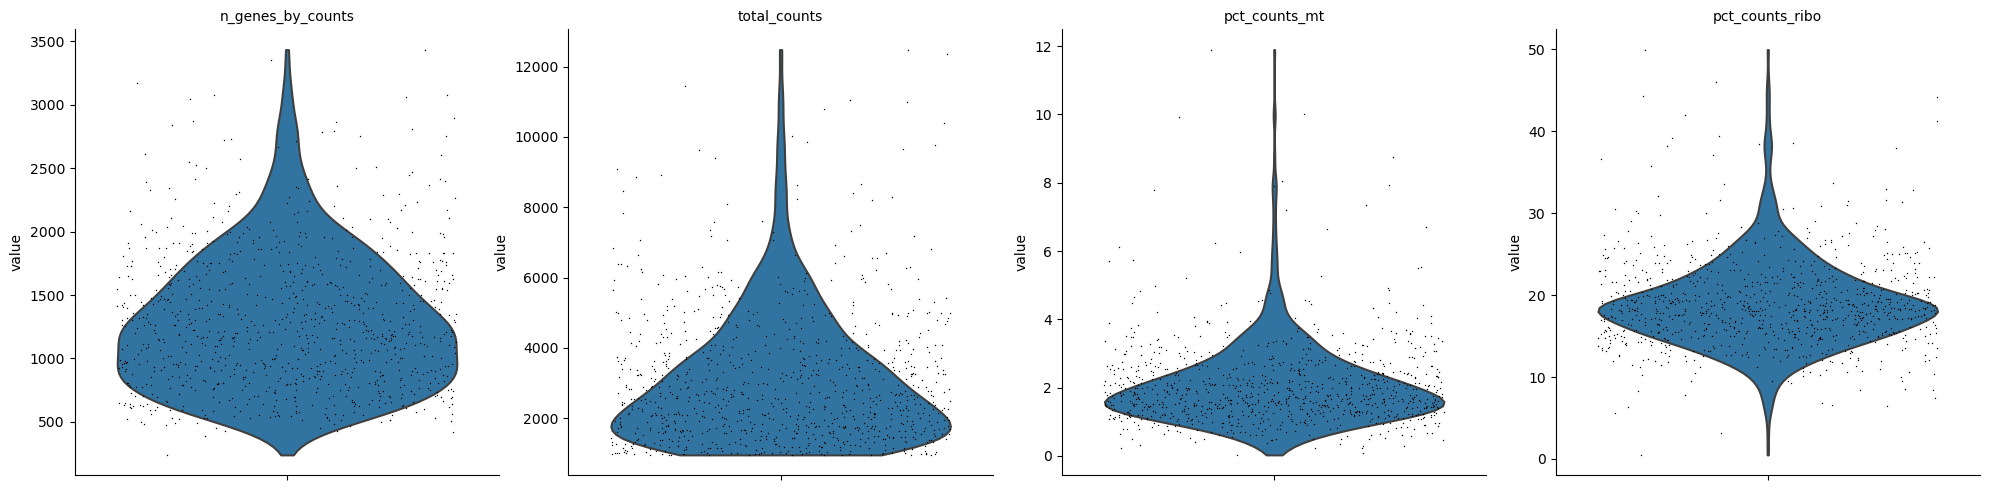

In [39]:
sc.pl.violin(adata_reMoveDoublet, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True) #QC

In [40]:
upper_lim = np.quantile(adata_reMoveDoublet.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [41]:
upper_lim

2674.340000000001

In [42]:
adata_lim = adata_reMoveDoublet[adata_reMoveDoublet.obs.n_genes_by_counts < upper_lim]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [43]:
adata_lim.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGCATGTAAGA    False               1109        2493.0            138.0   
AAACCTGGTGTGACGA    False                832        1487.0             52.0   
AAACGGGTCTTGTTTG    False               1501        3134.0             59.0   
AAAGATGGTCAGAGGT    False               1078        2467.0             30.0   
AAAGATGGTCCAAGTT    False               1648        3816.0             55.0   
...                   ...                ...           ...              ...   
TTTGCGCTCCTAGTGA    False               1006        1939.0             28.0   
TTTGGTTAGGGCTTGA    False               1329        2816.0             34.0   
TTTGGTTGTGAGTGAC    False                709        1193.0             24.0   
TTTGTCAAGATGTCGG    False               1537        3629.0             64.0   
TTTGTCATCTTCGAGA    False               1790        5028.0             79.0   

                  pct_counts_mt  total_counts_ribo  pct_counts_ribo  
AAACCTGCATGTAAGA       5.535500              575.0        23.064581  
AAACCTGGTGTGACGA       3.496974              297.0        19.973101  
AAACGGGTCTTGTTTG       1.882578              772.0        24.633057  
AAAGATGGTCAGAGGT       1.216052              523.0        21.199837  
AAAGATGGTCCAAGTT       1.441300              500.0        13.102725  
...                         ...                ...              ...  
TTTGCGCTCCTAGTGA       1.444043              507.0        26.147499  
TTTGGTTAGGGCTTGA       1.207386              583.0        20.703125  
TTTGGTTGTGAGTGAC       2.011735              199.0        16.680637  
TTTGTCAAGATGTCGG       1.763571              693.0        19.096170  
TTTGTCATCTTCGAGA       1.571201              831.0        16.527445  

[921 rows x 7 columns]

In [45]:
adata_mt_filter_20 = adata_lim[adata_lim.obs.pct_counts_mt < 20]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


#Normalize

In [46]:
adata_mt_filter_20.X.sum(axis=1)

array([2493., 1487., 3133., 2465., 3815., 3869., 3655., 1740., 1254.,
       2130., 6707., 2303.,  959., 3275., 3469., 1271., 3483., 1815.,
       3358., 3307., 4237., 1768., 1433., 5615., 2648., 8281., 4999.,
        989., 3432.,  995., 3263., 4574., 5542., 1021., 6080., 1568.,
       1781., 1917., 1630., 1710., 2809., 1428., 2462., 5721., 2554.,
       2366., 1896., 7318., 2275., 2369., 2268., 3593., 1243., 2975.,
       1407., 5379., 4088., 1100., 2871., 4314., 2051., 1704., 2616.,
       1969., 2731., 3386., 1632., 2622., 3745.,  999., 1377., 3045.,
       1115., 1223., 5601., 2330.,  964., 1412., 1440., 2122., 1935.,
       1014., 6808., 1500., 1255., 6311., 1210., 1683., 3010., 1714.,
       7060., 4222., 1012., 2837., 4565., 1093., 2630., 1347., 1053.,
       2350., 2447., 1270., 1710., 2706., 4998., 1071., 1006., 2159.,
       3180., 5608., 3261., 1496., 1709., 1657., 5986., 3756., 3530.,
       2120., 1603., 1173., 2676., 2494., 2159., 2508., 2576.,  961.,
       4327., 3367.,

In [47]:
sc.pp.normalize_total(adata_mt_filter_20, target_sum=1e4) #normalize every cell to 10,000 UMI

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [48]:
adata_mt_filter_20.X.sum(axis = 1)

array([10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   ,  9999.999, 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   ,  9999.999, 10000.   , 10000.   , 10000.001, 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.001, 10000.   , 10000.001, 10000.   , 10000.   ,
        9999.999, 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   ,  9999.999, 10000.   , 10000.   , 10000.   ,
       10000.001, 10000.   , 10000.001, 10000.   , 10000.001, 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.001, 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   ,  9999.999, 

In [49]:
sc.pp.log1p(adata_mt_filter_20) #change to log counts

In [50]:
adata_mt_filter_20.X.sum(axis = 1)

array([2168.9329, 1942.3789, 2613.4702, 2088.3545, 2679.9497, 2633.148 ,
       2706.8035, 2080.3982, 1709.9238, 2193.    , 2966.4844, 2039.5692,
       1212.4568, 2484.8333, 2427.8557, 1740.0029, 2477.2988, 2192.6396,
       2532.962 , 2441.752 , 2557.3872, 2090.3481, 1771.1838, 2662.0396,
       2385.7197, 3030.5771, 2643.2534, 1395.2593, 2493.9448, 1684.825 ,
       2455.0093, 2602.6323, 2693.7852, 1661.1578, 2925.5586, 1732.0862,
       1829.0122, 2067.6277, 1846.0665, 1879.755 , 2302.1187, 1886.084 ,
       2230.0122, 3042.5217, 2421.9578, 1944.9236, 1660.503 , 3122.7168,
       2304.1958, 2004.2904, 2361.1648, 2615.8357, 1497.7537, 2504.0452,
       1759.0015, 2730.2114, 2661.3408, 1453.3474, 2327.2136, 2417.675 ,
       2096.768 , 1731.2864, 2493.6523, 1850.4834, 2428.1357, 2276.7769,
       1843.7253, 2256.6453, 2404.8042, 1345.1345, 1668.8943, 2534.7607,
       1296.7468, 1738.2708, 2614.7754, 2287.6616, 1674.1986, 1625.7876,
       1678.1873, 2112.501 , 1858.273 , 1800.0421, 

In [51]:
adata_raw = adata_mt_filter_20

#Clustering


In [52]:
sc.pp.highly_variable_genes(adata_raw, n_top_genes = 2000)


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [53]:
adata_raw.var

mt   ribo  n_cells_by_counts  mean_counts  \
FO538757.2     False  False                 35     0.038298   
AP006222.2     False  False                 58     0.067021   
RP11-206L10.9  False  False                 10     0.011702   
LINC00115      False  False                  6     0.006383   
FAM41C         False  False                 11     0.013830   
...              ...    ...                ...          ...   
AC145212.4     False  False                  4     0.004255   
AC011043.1     False  False                 22     0.024468   
AL592183.1     False  False                 10     0.010638   
AC007325.4     False  False                 23     0.025532   
AC240274.1     False  False                  3     0.003191   

               pct_dropout_by_counts  total_counts  n_cells  highly_variable  \
FO538757.2                 96.276596          36.0       35            False   
AP006222.2                 93.829787          63.0       58            False   
RP11-206L10.9              98.936170          11.0       10            False   
LINC00115                  99.361702           6.0        6             True   
FAM41C                     98.829787          13.0       11            False   
...                              ...           ...      ...              ...   
AC145212.4                 99.574468           4.0        4            False   
AC011043.1                 97.659574          23.0       22            False   
AL592183.1                 98.936170          10.0       10            False   
AC007325.4                 97.553191          24.0       23            False   
AC240274.1                 99.680851           3.0        3            False   

                  means  dispersions  dispersions_norm  
FO538757.2     0.130745     1.541665          0.006657  
AP006222.2     0.169059     1.544727          0.016346  
RP11-206L10.9  0.038575     1.424227         -0.364972  
LINC00115      0.024655     1.757345          0.689168  
FAM41C         0.032427     1.401661         -0.436382  
...                 ...          ...               ...  
AC145212.4     0.010188     1.331313         -0.658995  
AC011043.1     0.072498     1.447546         -0.291179  
AL592183.1     0.037988     1.434148         -0.333578  
AC007325.4     0.071841     1.293986         -0.777116  
AC240274.1     0.007436     0.973069         -1.792645  

[14077 rows x 11 columns]

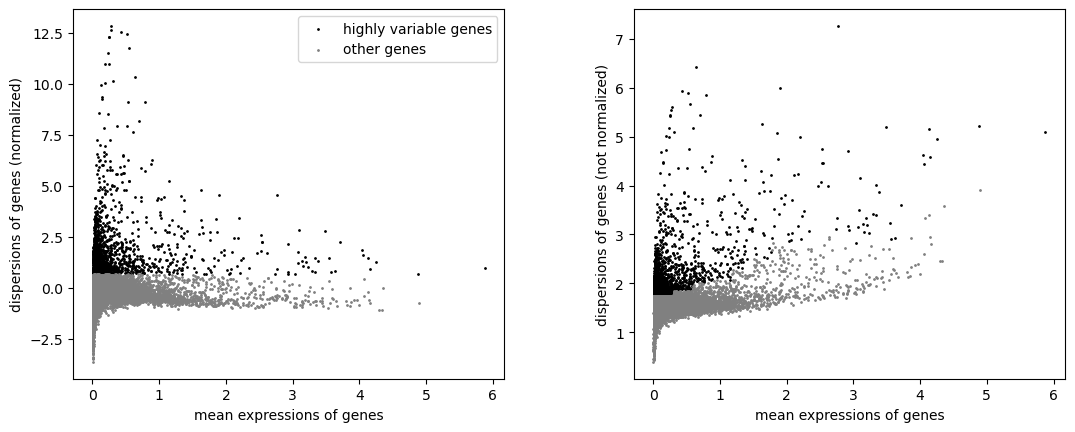

In [54]:
sc.pl.highly_variable_genes(adata_raw)

In [55]:
adata_top_gene = adata_raw[:, adata_raw.var.highly_variable]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [56]:
sc.pp.regress_out(adata_top_gene, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:619: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if keys[0] in adata.obs_keys() and is_categorical_dtype(adata.obs[keys[0]]):


In [57]:
sc.pp.scale(adata_top_gene, max_value=10)


In [58]:
sc.tl.pca(adata_top_gene, svd_solver='arpack')


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


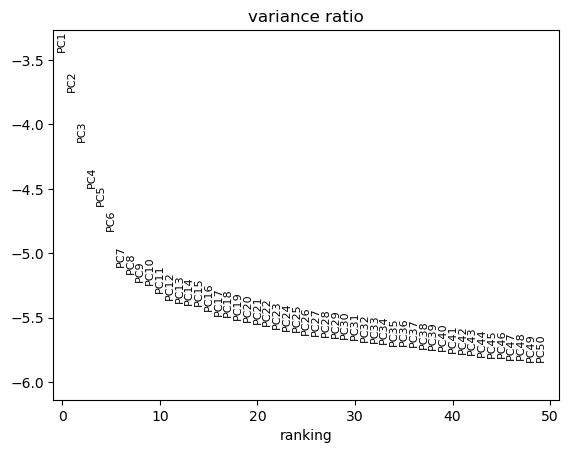

In [59]:
sc.pl.pca_variance_ratio(adata_top_gene, log=True, n_pcs = 50)


In [60]:
sc.pp.neighbors(adata_top_gene, n_pcs = 30)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/uma

In [61]:
adata_top_gene.obsp['distances'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
sc.tl.umap(adata_top_gene)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


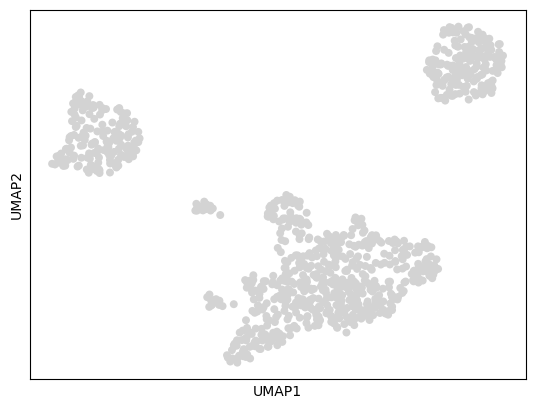

In [63]:
sc.pl.umap(adata_top_gene)

In [64]:
sc.tl.leiden(adata_top_gene, resolution = 0.5)

In [65]:
adata_top_gene.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGCATGTAAGA    False               1109        2493.0            138.0   
AAACCTGGTGTGACGA    False                832        1487.0             52.0   
AAACGGGTCTTGTTTG    False               1501        3134.0             59.0   
AAAGATGGTCAGAGGT    False               1078        2467.0             30.0   
AAAGATGGTCCAAGTT    False               1648        3816.0             55.0   
...                   ...                ...           ...              ...   
TTTGCGCTCCTAGTGA    False               1006        1939.0             28.0   
TTTGGTTAGGGCTTGA    False               1329        2816.0             34.0   
TTTGGTTGTGAGTGAC    False                709        1193.0             24.0   
TTTGTCAAGATGTCGG    False               1537        3629.0             64.0   
TTTGTCATCTTCGAGA    False               1790        5028.0             79.0   

                  pct_counts_mt  total_counts_ribo  pct_counts_ribo leiden  
AAACCTGCATGTAAGA       5.535500              575.0        23.064581      1  
AAACCTGGTGTGACGA       3.496974              297.0        19.973101      2  
AAACGGGTCTTGTTTG       1.882578              772.0        24.633057      2  
AAAGATGGTCAGAGGT       1.216052              523.0        21.199837      0  
AAAGATGGTCCAAGTT       1.441300              500.0        13.102725      6  
...                         ...                ...              ...    ...  
TTTGCGCTCCTAGTGA       1.444043              507.0        26.147499      1  
TTTGGTTAGGGCTTGA       1.207386              583.0        20.703125      0  
TTTGGTTGTGAGTGAC       2.011735              199.0        16.680637      1  
TTTGTCAAGATGTCGG       1.763571              693.0        19.096170      7  
TTTGTCATCTTCGAGA       1.571201              831.0        16.527445      3  

[921 rows x 8 columns]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


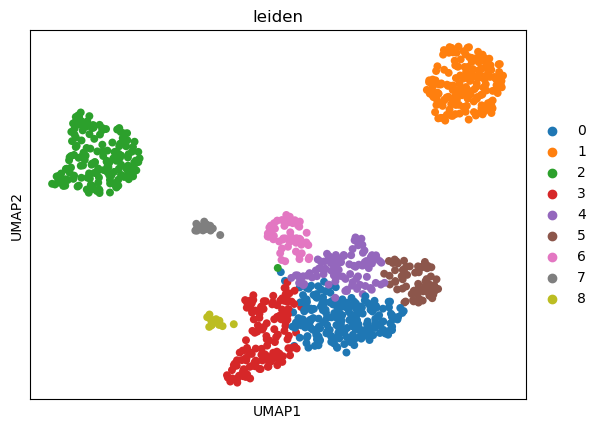

In [66]:
sc.pl.umap(adata_top_gene,color=['leiden'])

In [78]:
def extract_name(filePath):
    filename = os.path.basename(filePath)
    status = filename.split('_')[-1].split('.')[0]
    return status

In [257]:
def extract_name_index(filePath):
    # Get the file name without extension
    filename = os.path.splitext(os.path.basename(filePath))[0]
    # Split the filename by underscore and return the last part
    parts = filename.split('_')
    return parts[-2] + "_" + parts[-1]

In [258]:
def pp(csv_path):
    new_adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(new_adata, min_cells = 10)
    sc.pp.highly_variable_genes(new_adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(new_adata)
    vae = scvi.model.SCVI(new_adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    new_adata = sc.read_csv(csv_path).T
    new_adata.obs['Sample'] = extract_name_index(csv_path) # csv_path.split('_')[2] #'raw_counts/GSM5226574_Diabetes_raw_counts.csv'
    
    new_adata.obs['doublet'] = new_adata.obs.index.isin(doublets.index)
    new_adata = new_adata[~new_adata.obs.doublet]
    
    
    sc.pp.filter_cells(new_adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(new_adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    new_adata.var['mt'] = new_adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    new_adata.var['ribo'] = new_adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(new_adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(new_adata.obs.n_genes_by_counts.values, .98)
    new_adata = new_adata[new_adata.obs.n_genes_by_counts < upper_lim]
    new_adata = new_adata[new_adata.obs.pct_counts_mt < 20]

    return new_adata

In [259]:
import os

In [260]:
out = []
file_path = '/data2/ZenNa/DFU_Project/Data/Footskin/'
for file in os.listdir(file_path):
    out.append(pp(file_path + file))

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value fo

Epoch 400/400: 100%|█| 400/400 [00:22<00:00, 17.98it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:22<00:00, 18.00it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:17<00:00, 22.68it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:17<00:00, 22.84it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:22<00:00,  5.58it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:22<00:00,  4.84it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 277/400:  69%|▋| 277/400 [00:47<00:20,  5.89it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.256. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:21<00:00,  4.95it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:21<00:00,  4.92it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 278/400:  70%|▋| 278/400 [00:44<00:19,  6.21it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.253. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:52<00:00,  7.20it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:52<00:00,  7.68it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 322/400:  80%|▊| 322/400 [00:33<00:08,  9.60it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.359. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:44<00:00,  8.48it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:44<00:00,  8.98it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 337/400:  84%|▊| 337/400 [00:29<00:05, 11.28it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.295. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:36<00:00, 11.41it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:36<00:00, 11.00it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:28<00:00, 14.01it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:28<00:00, 14.05it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:32<00:00, 12.27it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:32<00:00, 12.39it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:26<00:00, 15.37it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:26<00:00, 15.37it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:41<00:00,  9.05it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:41<00:00,  9.62it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 353/400:  88%|▉| 353/400 [00:29<00:03, 12.10it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.358. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:45<00:00,  7.94it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:45<00:00,  8.83it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 346/400:  86%|▊| 346/400 [00:33<00:05, 10.32it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.306. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:31<00:00,  4.52it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:31<00:00,  4.38it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 296/400:  74%|▋| 296/400 [00:55<00:19,  5.32it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.231. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:43<00:00,  8.27it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:43<00:00,  9.10it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:35<00:00, 11.30it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:35<00:00, 11.21it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:03<00:00,  6.47it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:03<00:00,  6.35it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 296/400:  74%|▋| 296/400 [00:36<00:12,  8.02it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.306. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:59<00:00,  6.77it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:59<00:00,  6.77it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 368/400:  92%|▉| 368/400 [00:44<00:03,  8.30it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.245. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:40<00:00,  9.97it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:40<00:00,  9.95it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:32<00:00, 12.37it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:32<00:00, 12.23it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:53<00:00,  6.99it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:53<00:00,  7.47it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 228/400:  57%|▌| 228/400 [00:24<00:18,  9.39it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.301. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:11<00:00, 32.75it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:11<00:00, 33.97it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 257/400:  64%|▋| 257/400 [00:06<00:03, 41.24it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.320. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:27<00:00, 13.58it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:27<00:00, 14.35it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 344/400:  86%|▊| 344/400 [00:19<00:03, 17.89it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.407. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:16<00:00,  6.35it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:16<00:00,  5.23it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 221/400:  55%|▌| 221/400 [00:33<00:27,  6.61it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.246. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:41<00:00,  9.46it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:41<00:00,  9.75it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:34<00:00, 11.75it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:34<00:00, 11.63it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:00<00:00,  6.51it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:00<00:00,  6.62it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:50<00:00,  7.75it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:50<00:00,  7.88it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:48<00:00,  7.99it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:48<00:00,  8.31it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 375/400:  94%|▉| 375/400 [00:35<00:02, 10.47it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.342. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:39<00:00,  9.89it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:39<00:00, 10.02it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 341/400:  85%|▊| 341/400 [00:27<00:04, 12.22it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.380. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:00<00:00,  7.97it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:00<00:00,  6.63it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 301/400:  75%|▊| 301/400 [00:36<00:12,  8.15it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.243. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:12<00:00,  5.47it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:12<00:00,  5.55it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 305/400:  76%|▊| 305/400 [00:44<00:13,  6.80it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.330. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:09<00:00,  5.70it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:09<00:00,  5.75it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 321/400:  80%|▊| 321/400 [00:46<00:11,  6.87it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.333. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:52<00:00,  7.69it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:52<00:00,  7.68it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:42<00:00,  9.45it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:42<00:00,  9.47it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:37<00:00, 10.59it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:37<00:00, 10.65it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 224/400:  56%|▌| 224/400 [00:16<00:13, 13.26it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.320. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:31<00:00, 12.77it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:31<00:00, 12.70it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:24<00:00, 16.20it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:24<00:00, 16.15it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:12<00:00,  5.48it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:12<00:00,  5.50it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 261/400:  65%|▋| 261/400 [00:38<00:20,  6.75it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.231. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:20<00:00, 19.59it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:20<00:00, 19.14it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:16<00:00, 25.09it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:16<00:00, 24.78it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:08<00:00,  5.70it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:08<00:00,  5.81it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 365/400:  91%|▉| 365/400 [00:50<00:04,  7.17it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.316. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:16<00:00,  4.94it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:16<00:00,  5.23it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [01:00<00:00,  6.71it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:00<00:00,  6.61it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:18<00:00, 21.36it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:18<00:00, 21.23it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [00:15<00:00, 25.35it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:15<00:00, 25.30it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

In [261]:
out [0]
adata_integrate = sc.concat(out)
sc.pp.filter_genes(adata_integrate, min_cells = 10)
adata_integrate.X
from scipy.sparse import csr_matrix


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_nam

In [262]:
adata_integrate.X = csr_matrix(adata_integrate.X)

In [263]:
adata_integrate.X

<92424x11876 sparse matrix of type '<class 'numpy.float32'>'
	with 183231792 stored elements in Compressed Sparse Row format>

In [264]:
adata_integrate.write_h5ad('combined.h5ad')

In [265]:
adata_integrate = sc.read_h5ad('combined.h5ad')

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [266]:
adata_integrate.obs.groupby('Sample').count()

/tmp/ipykernel_1965572/1526754773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_integrate.obs.groupby('Sample').count()


doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                                         
GSM5050522_Diabetic            965      965                965           965   
GSM5050523_DFU- healer        3871     3871               3871          3871   
GSM5050524_Diabetic            531      531                531           531   
GSM5050525_Diabetic           1944     1944               1944          1944   
GSM5050526_Diabetic            990      990                990           990   
GSM5050527_DFU- healer        2807     2807               2807          2807   
GSM5050529_Diabetic           2577     2577               2577          2577   
GSM5050530_DFU-non healer     2233     2233               2233          2233   
GSM5050531_DFU- healer        1739     1739               1739          1739   
GSM5050532_DFU- healer        2368     2368               2368          2368   
GSM5050533_DFU-non healer     4204     4204               4204          4204   
GSM5050534_Healthy            4728     4728               4728          4728   
GSM5050538_Healthy            5291     5291               5291          5291   
GSM5050539_DFU- healer        2205     2205               2205          2205   
GSM5050540_Healthy            2863     2863               2863          2863   
GSM5050547_DFU- healer        4537     4537               4537          4537   
GSM5050548_Healthy            3444     3444               3444          3444   
GSM5050552_Healthy            2433     2433               2433          2433   
GSM5050555_Healthy            3395     3395               3395          3395   
GSM5050556_Healthy            4108     4108               4108          4108   
GSM5050557_DFU-non healer     4182     4182               4182          4182   
GSM5050558_DFU-non healer     3344     3344               3344          3344   
GSM5050562_Diabetic           1445     1445               1445          1445   
GSM5050563_DFU-non healer     2841     2841               2841          2841   
GSM5050564_Healthy            2538     2538               2538          2538   
GSM5050565_Diabetic           2388     2388               2388          2388   
GSM5050566_DFU- healer        2190     2190               2190          2190   
GSM5050567_Healthy            1070     1070               1070          1070   
GSM5050568_Healthy            2032     2032               2032          2032   
GSM5050569_DFU- healer        4117     4117               4117          4117   
GSM5050570_Diabetic           1625     1625               1625          1625   
GSM5050573_DFU- healer        3959     3959               3959          3959   
GSM5050574_Healthy            3460     3460               3460          3460   

                           total_counts_mt  pct_counts_mt  total_counts_ribo  \
Sample                                                                         
GSM5050522_Diabetic                    965            965                965   
GSM5050523_DFU- healer                3871           3871               3871   
GSM5050524_Diabetic                    531            531                531   
GSM5050525_Diabetic                   1944           1944               1944   
GSM5050526_Diabetic                    990            990                990   
GSM5050527_DFU- healer                2807           2807               2807   
GSM5050529_Diabetic                   2577           2577               2577   
GSM5050530_DFU-non healer             2233           2233               2233   
GSM5050531_DFU- healer                1739           1739               1739   
GSM5050532_DFU- healer                2368           2368               2368   
GSM5050533_DFU-non healer             4204           4204               4204   
GSM5050534_Healthy                    4728           4728               4728   
GSM5050538_Healthy                    5291           5291               5291   
GSM5050539_DFU- healer    

In [268]:
sc.pp.filter_genes(adata_integrate, min_cells = 100)

In [269]:
adata_integrate

AnnData object with n_obs × n_vars = 92424 × 11876
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [270]:
adata_integrate.layers['counts'] = adata_integrate.X.copy()

In [271]:
sc.pp.normalize_total(adata_integrate, target_sum = 1e4)
sc.pp.log1p(adata_integrate)
adata_integrate.raw = adata_integrate

In [272]:
adata_integrate.obs.head()

Sample  doublet  n_genes  n_genes_by_counts  \
AAACCCAAGGTCGAGT-1  GSM5050567_Healthy    False     7618               7618   
AAACCCATCCCATTTA-1  GSM5050567_Healthy    False     4428               4428   
AAACGAAAGCATCCTA-1  GSM5050567_Healthy    False      749                749   
AAACGAATCGATGCAT-1  GSM5050567_Healthy    False     2549               2549   
AAAGGATAGCTTCATG-1  GSM5050567_Healthy    False     3853               3853   

                    total_counts  total_counts_mt  pct_counts_mt  \
AAACCCAAGGTCGAGT-1       57996.0              0.0            0.0   
AAACCCATCCCATTTA-1       16590.0              0.0            0.0   
AAACGAAAGCATCCTA-1        1765.0              0.0            0.0   
AAACGAATCGATGCAT-1        8681.0              0.0            0.0   
AAAGGATAGCTTCATG-1       17678.0              0.0            0.0   

                    total_counts_ribo  pct_counts_ribo  
AAACCCAAGGTCGAGT-1             8497.0        14.651011  
AAACCCATCCCATTTA-1             2198.0        13.248946  
AAACGAAAGCATCCTA-1              700.0        39.660057  
AAACGAATCGATGCAT-1             1011.0        11.646124  
AAAGGATAGCTTCATG-1             3493.0        19.759024

In [273]:
adata_integrate

AnnData object with n_obs × n_vars = 92424 × 11876
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [274]:
sc.pp.normalize_total(adata_integrate, target_sum = 1e4)
sc.pp.log1p(adata_integrate)
adata_integrate_raw = adata_integrate

In [275]:
adata_integrate_raw.obs.head()

Sample  doublet  n_genes  n_genes_by_counts  \
AAACCCAAGGTCGAGT-1  GSM5050567_Healthy    False     7618               7618   
AAACCCATCCCATTTA-1  GSM5050567_Healthy    False     4428               4428   
AAACGAAAGCATCCTA-1  GSM5050567_Healthy    False      749                749   
AAACGAATCGATGCAT-1  GSM5050567_Healthy    False     2549               2549   
AAAGGATAGCTTCATG-1  GSM5050567_Healthy    False     3853               3853   

                    total_counts  total_counts_mt  pct_counts_mt  \
AAACCCAAGGTCGAGT-1       57996.0              0.0            0.0   
AAACCCATCCCATTTA-1       16590.0              0.0            0.0   
AAACGAAAGCATCCTA-1        1765.0              0.0            0.0   
AAACGAATCGATGCAT-1        8681.0              0.0            0.0   
AAAGGATAGCTTCATG-1       17678.0              0.0            0.0   

                    total_counts_ribo  pct_counts_ribo  
AAACCCAAGGTCGAGT-1             8497.0        14.651011  
AAACCCATCCCATTTA-1             2198.0        13.248946  
AAACGAAAGCATCCTA-1              700.0        39.660057  
AAACGAATCGATGCAT-1             1011.0        11.646124  
AAAGGATAGCTTCATG-1             3493.0        19.759024

In [276]:
scvi.model.SCVI.setup_anndata(adata_integrate_raw, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

model = scvi.model.SCVI(adata_integrate_raw)


In [277]:
model.train() #may take a while without GPU

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 87/87: 100%|█| 87/87 [07:48<00:00,  5.27s/it, v_num=1, train_loss_step=5.6

`Trainer.fit` stopped: `max_epochs=87` reached.


Epoch 87/87: 100%|█| 87/87 [07:48<00:00,  5.38s/it, v_num=1, train_loss_step=5.6


In [279]:
## save model after training finish
dir_path2 = '/data2/ZenNa/DFU_Project/Code/Model' 
model.save(dir_path,overwrite=True)
adata_integrate_raw.write_h5ad('adata_integrate_raw.h5ad')

In [280]:
adata_integrate_raw.obsm['X_scVI'] = model.get_latent_representation()

In [281]:
adata_integrate_raw.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [282]:
sc.pp.neighbors(adata_integrate_raw, use_rep = 'X_scVI')

In [286]:
sc.tl.umap(adata_integrate_raw)
sc.tl.leiden(adata_integrate_raw, resolution = 0.2)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatte

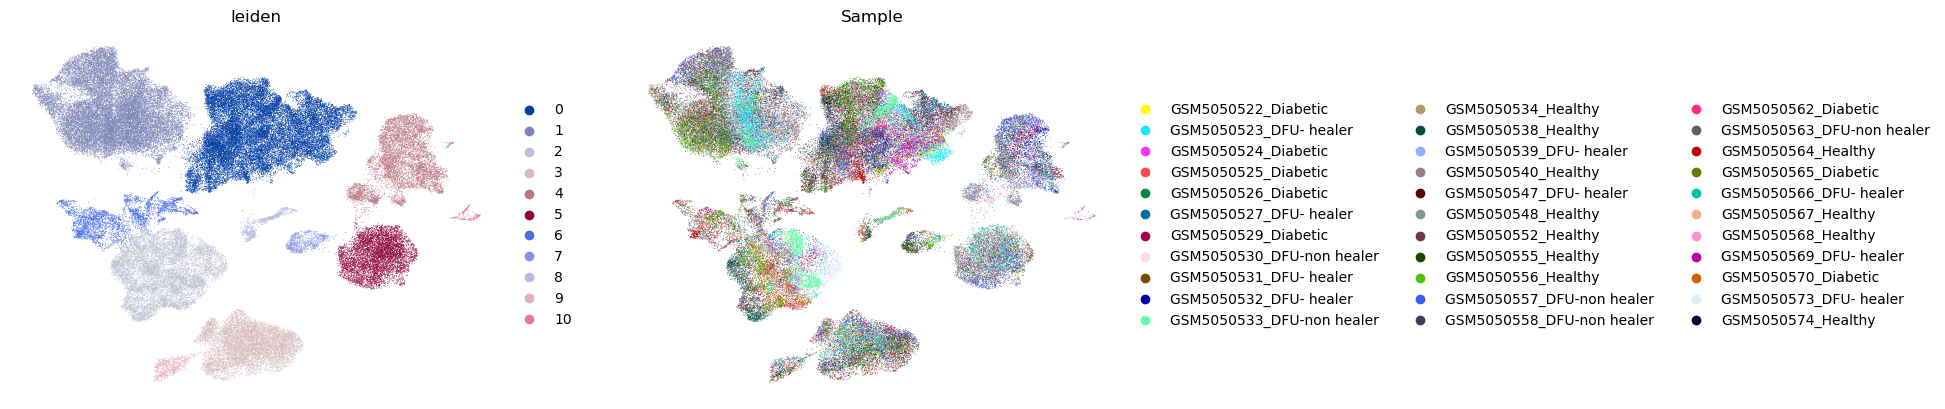

In [287]:
sc.pl.umap(adata_integrate_raw, color = ['leiden', 'Sample'], frameon = False)

In [288]:
sc.tl.rank_genes_groups(adata_integrate_raw, 'leiden')

In [289]:
markers = sc.get.rank_genes_groups_df(adata_integrate_raw, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group    names      scores  logfoldchanges     pvals  pvals_adj
0          0      DCN  477.635437        4.238130  0.000000   0.000000
1          0      LUM  381.410858        4.293679  0.000000   0.000000
2          0     MMP2  362.988586        4.824518  0.000000   0.000000
3          0      C1S  319.260010        3.586017  0.000000   0.000000
4          0   COL1A2  319.120209        3.173512  0.000000   0.000000
...      ...      ...         ...             ...       ...        ...
120118    10  HSD17B7    2.131061        0.869709  0.034120   0.048539
120119    10   TCEANC    2.124900        1.853776  0.034638   0.049223
120120    10     ELP5    2.120329        0.548872  0.035023   0.049723
120121    10   TBC1D9    2.119418        0.845115  0.035102   0.049823
120122    10   IMMP1L    2.118574        0.731170  0.035173   0.049918

[21229 rows x 6 columns]

In [290]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|████████████████████████████████████| 11/11 [01:41<00:00,  9.24s/it]


proba_de  proba_not_de  bayes_factor    scale1    scale2  \
DCN       0.9972        0.0028      5.875328  0.006690  0.000293   
CLMP      0.9966        0.0034      5.680571  0.000138  0.000014   
PTGFR     0.9964        0.0036      5.623212  0.000114  0.000007   
PDGFRA    0.9956        0.0044      5.421739  0.000249  0.000019   
FBLN1     0.9956        0.0044      5.421739  0.001585  0.000069   
...          ...           ...           ...       ...       ...   
UBE2B     0.7458        0.2542      1.076336  0.000105  0.000139   
VAMP4     0.7422        0.2578      1.057435  0.000015  0.000017   
PRKCSH    0.7358        0.2642      1.024252  0.000048  0.000059   
NIT1      0.7318        0.2682      1.003774  0.000014  0.000018   
GPANK1    0.7316        0.2684      1.002755  0.000022  0.000023   

        pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
DCN              0.0   0.25  5.043038    5.098651  1.833048  ...  56.186020   
CLMP             0.0   0.25  3.536137    3.524034  1.214640  ...   1.119475   
PTGFR            0.0   0.25  4.540632    4.383545  1.971501  ...   0.996700   
PDGFRA           0.0   0.25  4.125494    4.065657  1.654445  ...   1.900887   
FBLN1            0.0   0.25  4.979351    5.043660  1.801825  ...  13.802471   
...              ...    ...       ...         ...       ...  ...        ...   
UBE2B            0.0   0.25 -0.480916   -0.410199  0.747553  ...   0.529661   
VAMP4            0.0   0.25 -0.201219   -0.198024  0.741421  ...   0.072034   
PRKCSH           0.0   0.25 -0.327480   -0.319070  0.648365  ...   0.720339   
NIT1             0.0   0.25 -0.485888   -0.398958  0.745827  ...   0.076271   
GPANK1           0.0   0.25 -0.115850   -0.104378  0.714468  ...   0.220339   

        raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
DCN      1.184592               0.982279               0.297752   
CLMP     0.012381               0.501745               0.009214   
PTGFR    0.018639               0.443385               0.014512   
PDGFRA   0.019794               0.643555               0.014061   
FBLN1    0.324177               0.883279               0.155652   
...           ...                    ...                    ...   
UBE2B    1.000762               0.338983               0.527542   
VAMP4    0.116485               0.059322               0.102747   
PRKCSH   0.478537               0.470339               0.323502   
NIT1     0.136619               0.067797               0.119137   
GPANK1   0.178601               0.190678               0.149477   

        raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
DCN                71.106865              1.756618            True   
CLMP                1.260761              0.018019            True   
PTGFR               1.252078              0.022488            True   
PDGFRA              2.472790              0.029296            True   
FBLN1              16.977221              0.483013            True   
...                      ...                   ...             ...   
UBE2B               0.628251              1.408839           False   
VAMP4               0.076573              0.166200           False   
PRKCSH              0.934213              0.642923           False   
NIT1                0.087211              0.186004           False   
GPANK1              0.298733              0.254103           False   

        comparison  group1 group2  
DCN      0 vs Rest       0   Rest  
CLMP     0 vs Rest       0   Rest  
PTGFR    0 vs Rest       0   Rest  
PDGFRA   0 vs Rest       0   Rest  
FBLN1    0 vs Rest       0   Rest  
...            ...     ...    ...  
UBE2B   10 vs Rest      10   Rest  
VAMP4   10 vs Rest      10   Rest  
PRKCSH  10 vs Rest      10   Rest  
NIT1    10 vs Rest      10   Rest  
GPANK1  10 vs Rest      10   Rest  

[130636 rows x 22 columns]

In [291]:
markers_scvi_filled = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi_filled

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
DCN         0.9972        0.0028      5.875328  0.006690  0.000293   
CLMP        0.9966        0.0034      5.680571  0.000138  0.000014   
PTGFR       0.9964        0.0036      5.623212  0.000114  0.000007   
PDGFRA      0.9956        0.0044      5.421739  0.000249  0.000019   
FBLN1       0.9956        0.0044      5.421739  0.001585  0.000069   
...            ...           ...           ...       ...       ...   
HOPX        0.9142        0.0858      2.366030  0.000423  0.000232   
LLGL2       0.9140        0.0860      2.363483  0.000019  0.000018   
CDK2AP2     0.9136        0.0864      2.358405  0.000104  0.000047   
MAFB        0.9136        0.0864      2.358405  0.000367  0.000179   
SERPINB1    0.9130        0.0870      2.350828  0.000181  0.000096   

          pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
DCN                0.0   0.25  5.043038    5.098651  1.833048  ...  56.186020   
CLMP               0.0   0.25  3.536137    3.524034  1.214640  ...   1.119475   
PTGFR              0.0   0.25  4.540632    4.383545  1.971501  ...   0.996700   
PDGFRA             0.0   0.25  4.125494    4.065657  1.654445  ...   1.900887   
FBLN1              0.0   0.25  4.979351    5.043660  1.801825  ...  13.802471   
...                ...    ...       ...         ...       ...  ...        ...   
HOPX               0.0   0.25  1.050987    1.063570  1.940361  ...   0.008475   
LLGL2              0.0   0.25  0.720098    0.882679  1.838592  ...   0.144068   
CDK2AP2            0.0   0.25  1.150301    1.159143  0.834454  ...   1.313560   
MAFB               0.0   0.25  1.276953    1.333040  1.575740  ...   0.021186   
SERPINB1           0.0   0.25  1.163623    1.238481  1.245860  ...   0.173729   

          raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
DCN        1.184592               0.982279               0.297752   
CLMP       0.012381               0.501745               0.009214   
PTGFR      0.018639               0.443385               0.014512   
PDGFRA     0.019794               0.643555               0.014061   
FBLN1      0.324177               0.883279               0.155652   
...             ...                    ...                    ...   
HOPX       1.126824               0.008475               0.269981   
LLGL2      0.113479               0.114407               0.073166   
CDK2AP2    0.285279               0.584746               0.208086   
MAFB       1.130030               0.008475               0.331800   
SERPINB1   0.715614               0.156780               0.322623   

          raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
DCN                  71.106865              1.756618            True   
CLMP                  1.260761              0.018019            True   
PTGFR                 1.252078              0.022488            True   
PDGFRA                2.472790              0.029296            True   
FBLN1                16.977221              0.483013            True   
...                        ...                   ...             ...   
HOPX                  0.012111              1.470591            True   
LLGL2                 0.165800              0.150836            True   
CDK2AP2               1.528001              0.410455            True   
MAFB                  0.007301              1.450949            True   
SERPINB1              0.190676              0.959634            True   

          comparison  group1 group2  
DCN        0 vs Rest       0   Rest  
CLMP       0 vs Rest       0   Rest  
PTGFR      0 vs Rest       0   Rest  
PDGFRA     0 vs Rest       0   Rest  
FBLN1      0 vs Rest       0   Rest  
...              ...     ...    ...  
HOPX      10 vs Rest      10   Rest  
LLGL2     10 vs Rest      10   Rest  
CDK2AP2   10 vs Rest      10   Rest  
MAFB      10 vs Rest      10   Rest  
SERPINB1  10 vs Rest      10   Rest  

[7110 rows x 22 columns]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


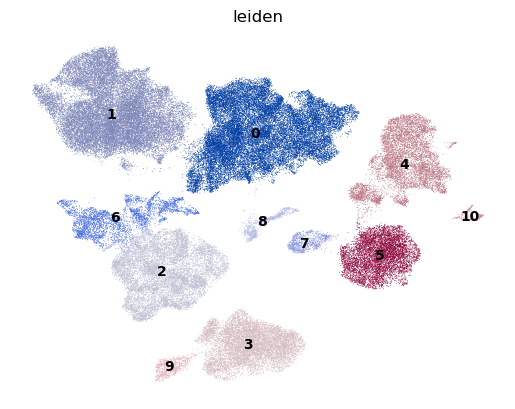

In [292]:
sc.pl.umap(adata_integrate_raw, color = ['leiden'], frameon = False, legend_loc = "on data")

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


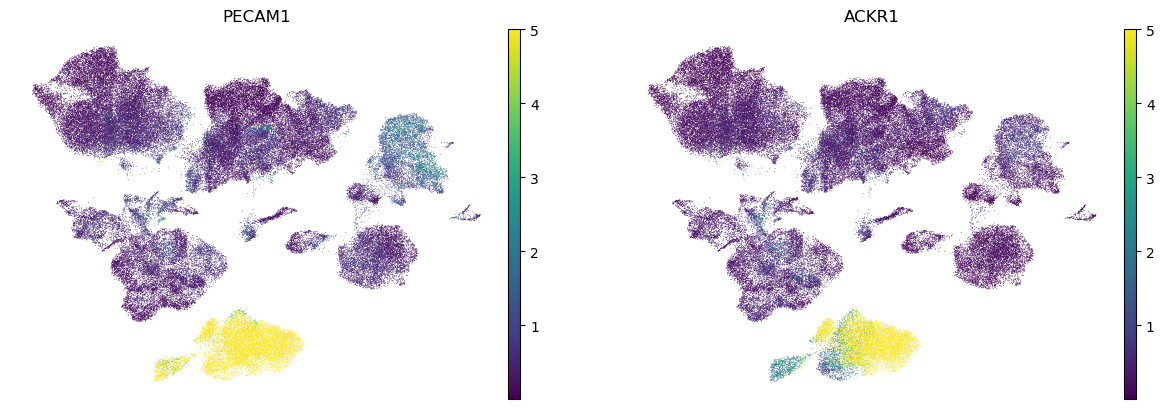

In [293]:
sc.pl.umap(adata_integrate_raw, color = ['PECAM1', 'ACKR1'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Vascular epithelial


In [294]:
markers[markers.names == 'PECAM1']

group   names      scores  logfoldchanges          pvals      pvals_adj
35628      3  PECAM1  233.692825        5.875263   0.000000e+00   0.000000e+00
48139      4  PECAM1   24.115107        1.073257  2.536799e-124  9.467951e-124
106898     9  PECAM1   45.613251        3.545490  5.247215e-233  1.531104e-231
119191    10  PECAM1    6.779439        1.617383   9.601571e-11   2.777790e-10

In [295]:
markers[markers.names == 'ACKR1']


group  names     scores  logfoldchanges  pvals  pvals_adj
35676     3  ACKR1  99.815865        6.319637    0.0        0.0

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


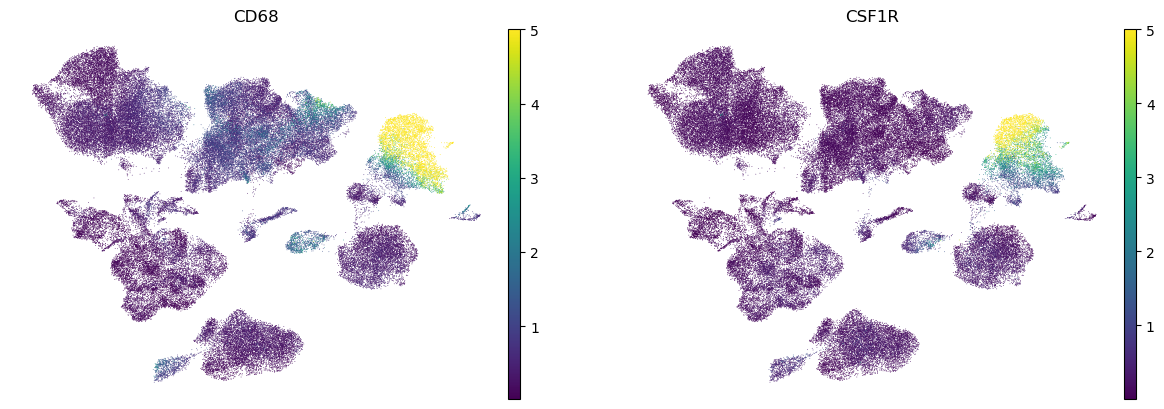

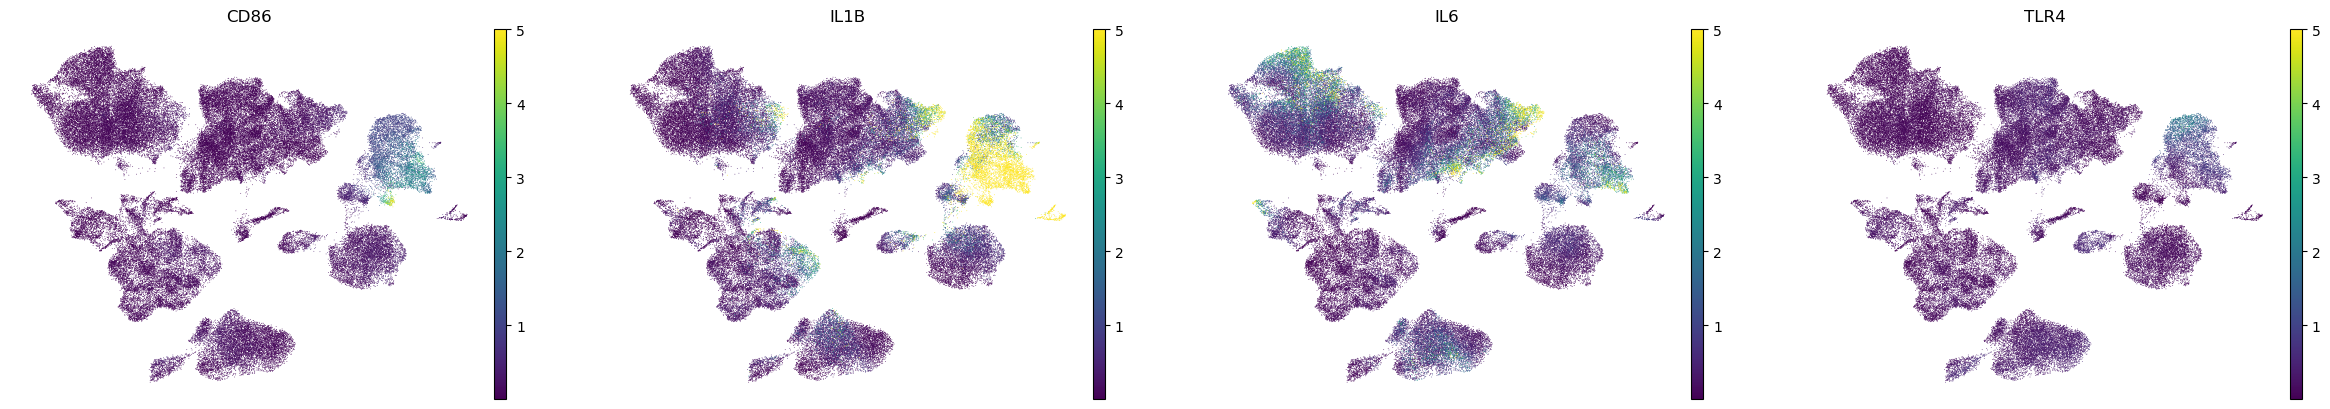

In [296]:
sc.pl.umap(adata_integrate_raw, color = ['CD68', 'CSF1R'], frameon = False, layer = 'scvi_normalized', vmax = 5) #M2 macrophage-6
sc.pl.umap(adata_integrate_raw, color = ['CD86', 'IL1B', 'IL6','TLR4'], frameon = False, layer = 'scvi_normalized', vmax = 5) #M1 macrophage



/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


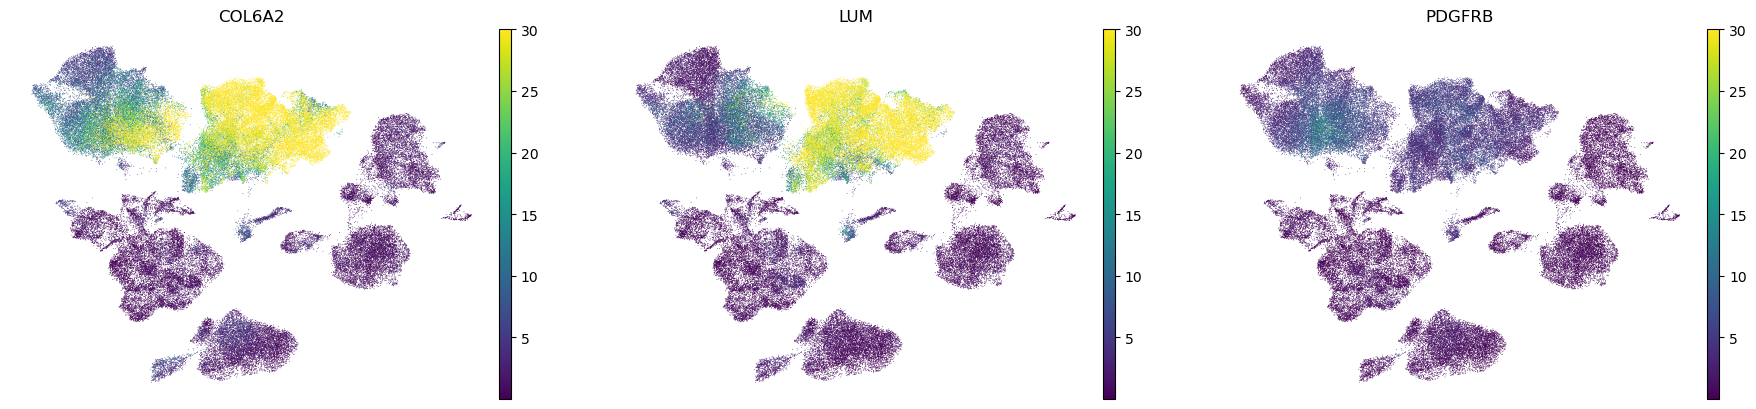

In [330]:
sc.pl.umap(adata_integrate_raw, color = ['COL6A2', 'LUM','PDGFRB'], frameon = False, layer = 'scvi_normalized', vmax = 30)  #Fibroblast 0 4


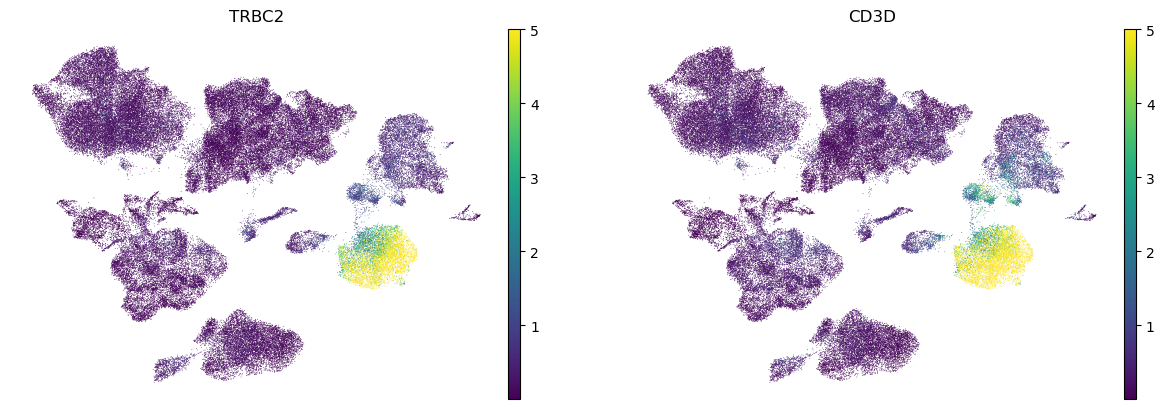

In [298]:
sc.pl.umap(adata_integrate_raw, color = ['TRBC2', 'CD3D'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Tcell 


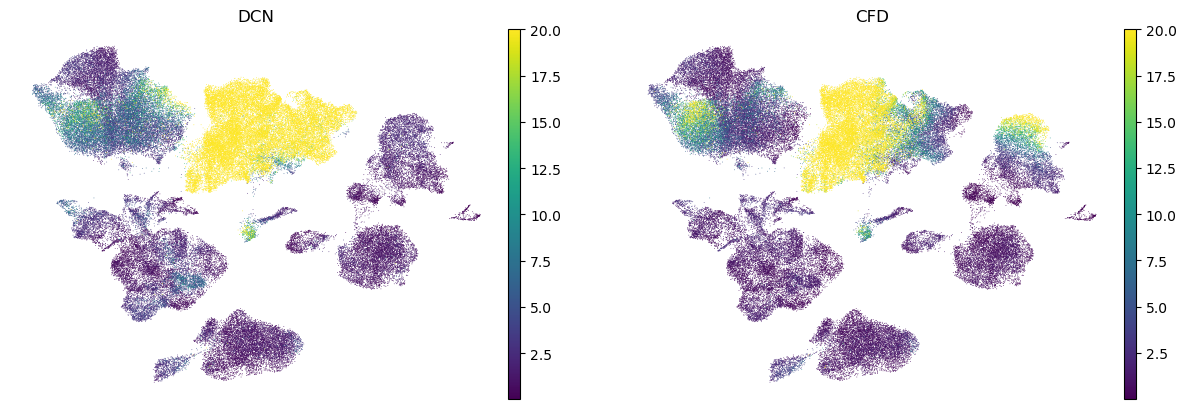

In [299]:
sc.pl.umap(adata_integrate_raw, color = ['DCN','CFD'], frameon = False, layer = 'scvi_normalized', vmax = 20) #Fibrobast

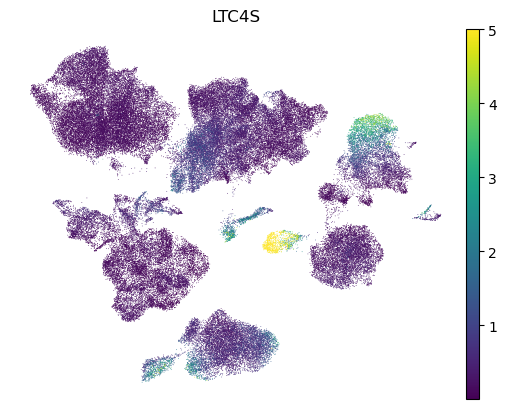

In [300]:
sc.pl.umap(adata_integrate_raw, color = ['LTC4S'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Mastcell


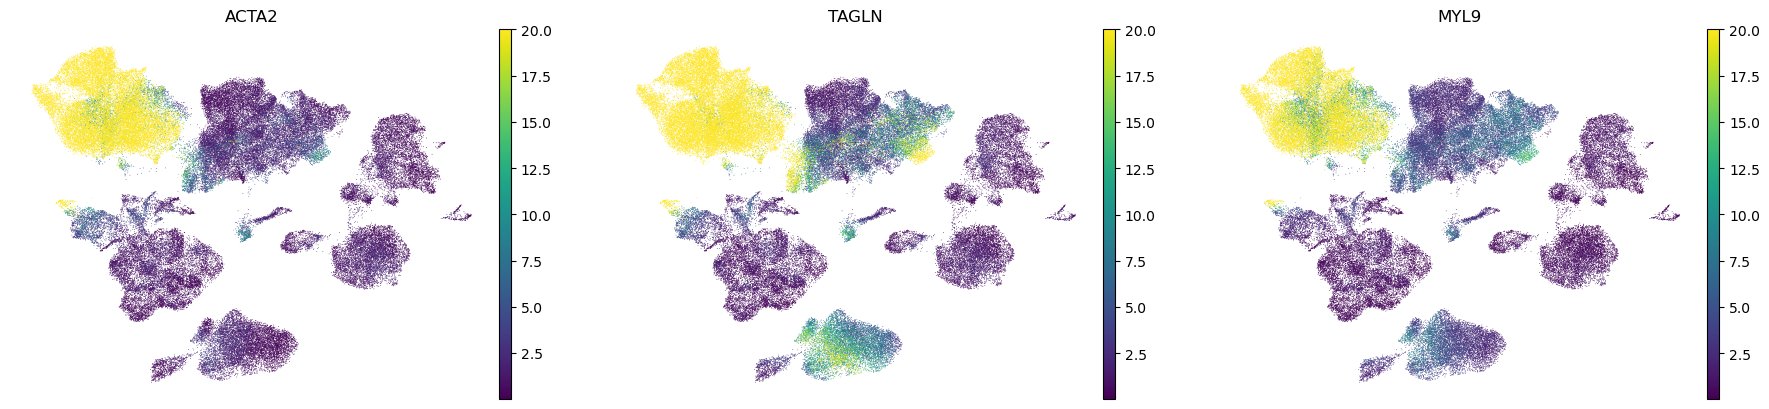

In [301]:
sc.pl.umap(adata_integrate_raw, color = ['ACTA2','TAGLN','MYL9'], frameon = False, layer = 'scvi_normalized', vmax = 20) #SMC

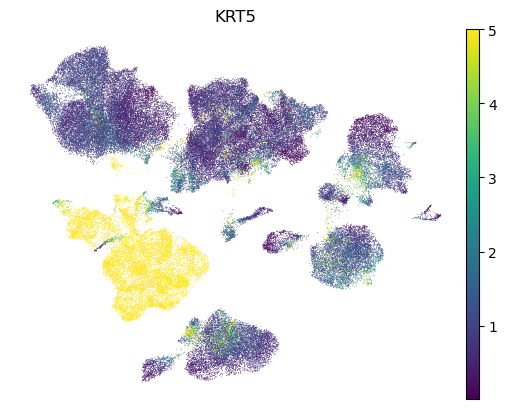

In [302]:
sc.pl.umap(adata_integrate_raw, color = ['KRT5'], frameon = False, layer = 'scvi_normalized', vmax = 5) #BasalKera

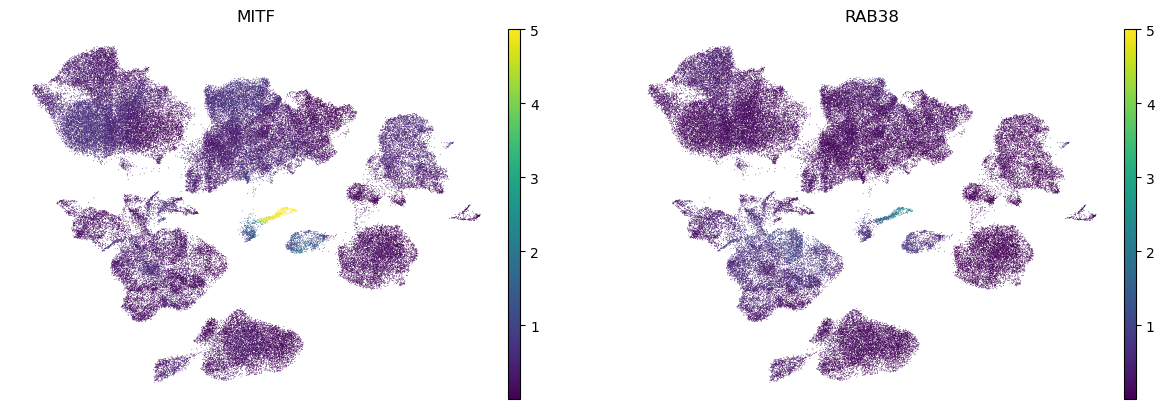

In [303]:
sc.pl.umap(adata_integrate_raw, color = ['MITF','RAB38'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Melanocytes

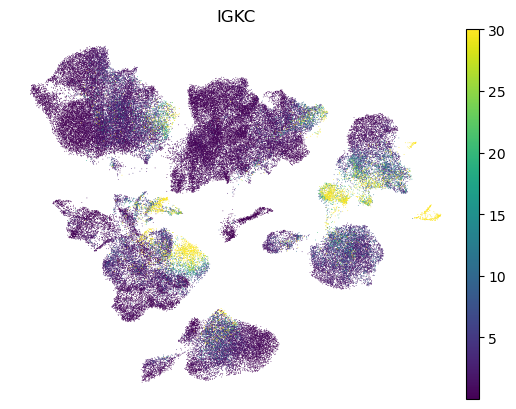

In [306]:
sc.pl.umap(adata_integrate_raw, color = ['IGKC'], frameon = False, layer = 'scvi_normalized', vmax = 30) #erythroid-like 

In [307]:
cell_type = {"0":"Fibroblast",
"1":"SMC",
"2":"Basalkera",
"3":"VasEpithelial",
"4":"Macrophage",
"5":"Tcell",
"6":"Basalkera",
"7":"Mastcell",
"8":"Melanocytes",
"9":"VasEpithelial",
"10":"Erythroid-like",
            }

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


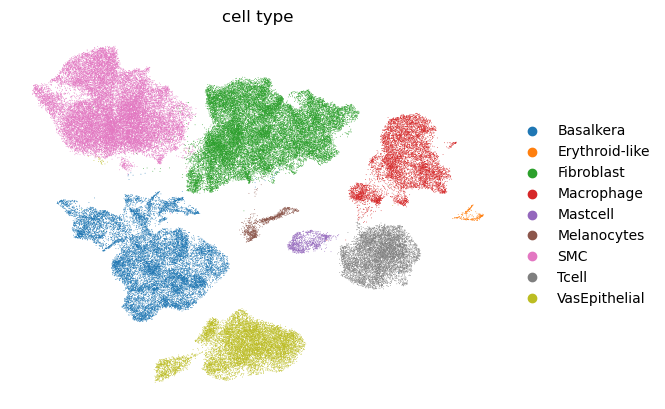

In [308]:
adata_integrate_raw.obs['cell type'] = adata_integrate_raw.obs.leiden.map(cell_type)
sc.pl.umap(adata_integrate_raw, color = ['cell type'], frameon = False)


In [309]:
adata_integrate_raw

AnnData object with n_obs × n_vars = 92424 × 11876
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell type_colors'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

In [310]:
adata_integrate_raw.obs.Sample.unique().tolist()


['GSM5050567_Healthy',
 'GSM5050534_Healthy',
 'GSM5050547_DFU- healer',
 'GSM5050563_DFU-non healer',
 'GSM5050552_Healthy',
 'GSM5050525_Diabetic',
 'GSM5050531_DFU- healer',
 'GSM5050530_DFU-non healer',
 'GSM5050529_Diabetic',
 'GSM5050538_Healthy',
 'GSM5050565_Diabetic',
 'GSM5050574_Healthy',
 'GSM5050558_DFU-non healer',
 'GSM5050539_DFU- healer',
 'GSM5050527_DFU- healer',
 'GSM5050524_Diabetic',
 'GSM5050562_Diabetic',
 'GSM5050557_DFU-non healer',
 'GSM5050532_DFU- healer',
 'GSM5050548_Healthy',
 'GSM5050564_Healthy',
 'GSM5050566_DFU- healer',
 'GSM5050555_Healthy',
 'GSM5050569_DFU- healer',
 'GSM5050573_DFU- healer',
 'GSM5050540_Healthy',
 'GSM5050568_Healthy',
 'GSM5050570_Diabetic',
 'GSM5050556_Healthy',
 'GSM5050526_Diabetic',
 'GSM5050523_DFU- healer',
 'GSM5050533_DFU-non healer',
 'GSM5050522_Diabetic']

#Counting cell

In [311]:
def map_condition(x):
    if 'Healthy' in x:
        return 'Healthy'
    elif 'Diabetic' in x:
        return 'Diabetic'
    elif 'DFU- healer' in x:
        return 'DFU- healer'
    else:
        return 'DFU-non healer'

In [312]:
adata_integrate_raw.obs['condition'] = adata_integrate_raw.obs.Sample.map(map_condition)
print(adata_integrate_raw.obs)

                                 Sample  doublet  n_genes  n_genes_by_counts  \
AAACCCAAGGTCGAGT-1   GSM5050567_Healthy    False     7618               7618   
AAACCCATCCCATTTA-1   GSM5050567_Healthy    False     4428               4428   
AAACGAAAGCATCCTA-1   GSM5050567_Healthy    False      749                749   
AAACGAATCGATGCAT-1   GSM5050567_Healthy    False     2549               2549   
AAAGGATAGCTTCATG-1   GSM5050567_Healthy    False     3853               3853   
...                                 ...      ...      ...                ...   
TTTGCGCTCCTAGTGA    GSM5050522_Diabetic    False     1006               1006   
TTTGGTTAGGGCTTGA    GSM5050522_Diabetic    False     1329               1329   
TTTGGTTGTGAGTGAC    GSM5050522_Diabetic    False      709                709   
TTTGTCAAGATGTCGG    GSM5050522_Diabetic    False     1537               1537   
TTTGTCATCTTCGAGA    GSM5050522_Diabetic    False     1790               1790   

                    total_counts  total

In [313]:
num_tot_cells = adata_integrate_raw.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

/tmp/ipykernel_1965572/2471726013.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata_integrate_raw.obs.groupby(['Sample']).count()


{'GSM5050522_Diabetic': 965,
 'GSM5050523_DFU- healer': 3871,
 'GSM5050524_Diabetic': 531,
 'GSM5050525_Diabetic': 1944,
 'GSM5050526_Diabetic': 990,
 'GSM5050527_DFU- healer': 2807,
 'GSM5050529_Diabetic': 2577,
 'GSM5050530_DFU-non healer': 2233,
 'GSM5050531_DFU- healer': 1739,
 'GSM5050532_DFU- healer': 2368,
 'GSM5050533_DFU-non healer': 4204,
 'GSM5050534_Healthy': 4728,
 'GSM5050538_Healthy': 5291,
 'GSM5050539_DFU- healer': 2205,
 'GSM5050540_Healthy': 2863,
 'GSM5050547_DFU- healer': 4537,
 'GSM5050548_Healthy': 3444,
 'GSM5050552_Healthy': 2433,
 'GSM5050555_Healthy': 3395,
 'GSM5050556_Healthy': 4108,
 'GSM5050557_DFU-non healer': 4182,
 'GSM5050558_DFU-non healer': 3344,
 'GSM5050562_Diabetic': 1445,
 'GSM5050563_DFU-non healer': 2841,
 'GSM5050564_Healthy': 2538,
 'GSM5050565_Diabetic': 2388,
 'GSM5050566_DFU- healer': 2190,
 'GSM5050567_Healthy': 1070,
 'GSM5050568_Healthy': 2032,
 'GSM5050569_DFU- healer': 4117,
 'GSM5050570_Diabetic': 1625,
 'GSM5050573_DFU- healer': 39

In [316]:
cell_type_counts = adata_integrate_raw.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]


/tmp/ipykernel_1965572/2020872192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_integrate_raw.obs.groupby(['Sample', 'condition', 'cell type']).count()


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/cat

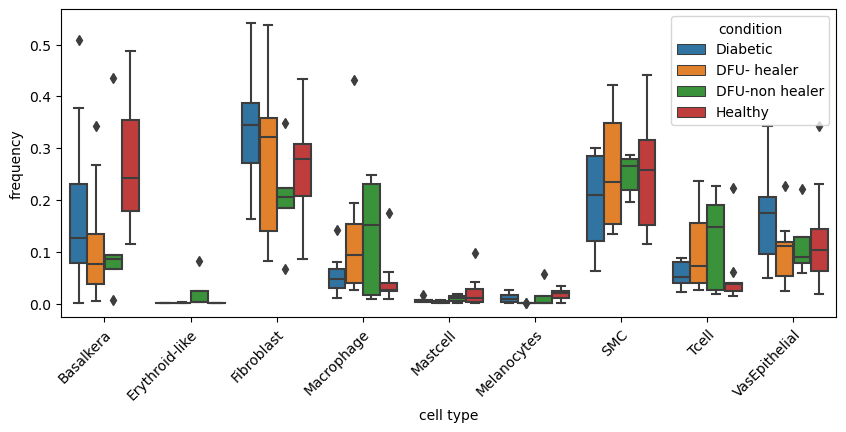

In [318]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')

plt.show()

In [319]:
subset = adata_integrate_raw[adata_integrate_raw.obs['cell type'].isin(['Fibroblast'])].copy()


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


# Extract DFU-Healer, DFU-Non-Healer 

In [351]:
group_column = 'condition'
groups_to_extract = ['DFU- healer', 'DFU-non healer']
filter_adata_integrate_raw = adata_integrate_raw[adata_integrate_raw.obs['condition'].isin(groups_to_extract)]
print(filter_adata_integrate_raw.obs)

                                     Sample  doublet  n_genes  \
AAACCCACAACCAACT     GSM5050547_DFU- healer    False     2075   
AAACCCACACAAAGCG     GSM5050547_DFU- healer    False     2104   
AAACCCATCGGTAGGA     GSM5050547_DFU- healer    False     4383   
AAACGAAAGGAGACCT     GSM5050547_DFU- healer    False     1709   
AAACGAACAGAGTTCT     GSM5050547_DFU- healer    False     1907   
...                                     ...      ...      ...   
TTTGGTTTCTGCCCTA  GSM5050533_DFU-non healer    False     1592   
TTTGGTTTCTTGTCAT  GSM5050533_DFU-non healer    False      749   
TTTGTCACATAAGACA  GSM5050533_DFU-non healer    False     1055   
TTTGTCAGTCTGCCAG  GSM5050533_DFU-non healer    False     2227   
TTTGTCAGTGTAAGTA  GSM5050533_DFU-non healer    False     1664   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAACCAACT               2075        5799.0              0.0   
AAACCCACACAAAGCG               2104        5921.0              0.0   
AAACCCATC

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


# Extract Fibroblast

In [352]:
subset_cell_Fibroblast = filter_adata_integrate_raw[filter_adata_integrate_raw.obs['cell type'].isin(['Fibroblast'])].copy()

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [353]:
subset_cell_Fibroblast.obs

AnnData object with n_obs × n_vars = 12049 × 11876
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'condition'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'Sample_colors', 'rank_genes_groups', 'cell type_colors'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

In [ ]:
import diffxpy.api as de

In [321]:
subset.X = subset.X.toarray()
len(subset.var)


11876

In [322]:
subset

AnnData object with n_obs × n_vars = 25788 × 11876
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'condition'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'Sample_colors', 'rank_genes_groups', 'cell type_colors'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

In [323]:
sc.pp.filter_genes(subset, min_cells=100)
len(subset.var)


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


11711

In [333]:
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})
subset.obs



Sample  doublet  n_genes  n_genes_by_counts  \
AAACCCATCCCATTTA-1   GSM5050567_Healthy    False     4428               4428   
AAACGAATCGATGCAT-1   GSM5050567_Healthy    False     2549               2549   
AACGGGATCCTTCAGC-1   GSM5050567_Healthy    False     2700               2700   
AAGACTCTCCGTAATG-1   GSM5050567_Healthy    False     3900               3900   
AAGGAATTCCCGAGGT-1   GSM5050567_Healthy    False     3020               3020   
...                                 ...      ...      ...                ...   
TTTACTGCAAGTACCT    GSM5050522_Diabetic    False     2285               2285   
TTTACTGCACACCGCA    GSM5050522_Diabetic    False     1184               1184   
TTTGCGCAGATGTGGC    GSM5050522_Diabetic    False     1149               1149   
TTTGGTTAGGGCTTGA    GSM5050522_Diabetic    False     1329               1329   
TTTGTCATCTTCGAGA    GSM5050522_Diabetic    False     1790               1790   

                    total_counts  total_counts_mt  pct_counts_mt  \
AAACCCATCCCATTTA-1       16590.0              0.0            0.0   
AAACGAATCGATGCAT-1        8681.0              0.0            0.0   
AACGGGATCCTTCAGC-1        8288.0              0.0            0.0   
AAGACTCTCCGTAATG-1       13872.0              0.0            0.0   
AAGGAATTCCCGAGGT-1        9674.0              0.0            0.0   
...                          ...              ...            ...   
TTTACTGCAAGTACCT          7113.0              0.0            0.0   
TTTACTGCACACCGCA          2867.0              0.0            0.0   
TTTGCGCAGATGTGGC          2419.0              0.0            0.0   
TTTGGTTAGGGCTTGA          2816.0              0.0            0.0   
TTTGTCATCTTCGAGA          5028.0              0.0            0.0   

                    total_counts_ribo  pct_counts_ribo  _scvi_batch  \
AAACCCATCCCATTTA-1             2198.0        13.248946            0   
AAACGAATCGATGCAT-1             1011.0        11.646124            0   
AACGGGATCCTTCAGC-1              767.0         9.254344            0   
AAGACTCTCCGTAATG-1             2292.0        16.522491            0   
AAGGAATTCCCGAGGT-1              837.0         8.652057            0   
...                               ...              ...          ...   
TTTACTGCAAGTACCT                978.0        13.749473            0   
TTTACTGCACACCGCA                571.0        19.916288            0   
TTTGCGCAGATGTGGC                545.0        22.529972            0   
TTTGGTTAGGGCTTGA                583.0        20.703125            0   
TTTGTCATCTTCGAGA                831.0        16.527445            0   

                    _scvi_labels leiden  _scvi_raw_norm_scaling   cell_type  \
AAACCCATCCCATTTA-1             0      0                0.619617  Fibroblast   
AAACGAATCGATGCAT-1             0      0                1.184553  Fibroblast   
AACGGGATCCTTCAGC-1             0      0                1.248440  Fibroblast   
AAGACTCTCCGTAATG-1             0      0                0.743882  Fibroblast   
AAGGAATTCCCGAGGT-1             0      0                1.059210  Fibroblast   
...                          ...    ...                     ...         ...   
TTTACTGCAAGTACCT               0      0                1.453700  Fibroblast   
TTTACTGCACACCGCA               0      0                3.595829  Fibroblast   
TTTGCGCAGATGTGGC               0      0                4.297379  Fibroblast   
TTTGGTTAGGGCTTGA               0      0                3.679176  Fibroblast   
TTTGTCATCTTCGAGA               0      0                2.056344  Fibroblast   

                   condition  
AAACCCATCCCATTTA-1   Healthy  
AAACGAATCGATGCAT-1   Healthy  
AACGGGATCCTTCAGC-1   Healthy  
AAGACTCTCCGTAATG-1   Healthy  
AAGGAATTCCCGAGGT-1   Healthy  
...                      ...  
TTTACTGCAAGTACCT    Diabetic  
TTTACTGCACACCGCA    Diabetic  
TTTGCGCAGATGTGGC    Diabetic  
TTTGGTTAGGGCTTGA    Diabetic  
TTTGTCATCTTCGAGA    Diabetic  

[25788 rows x 15 columns]

In [332]:
sc.pl.highly_variable_genes(subset)

KeyError: 'hvg'